<a href="https://colab.research.google.com/github/Fanova-AR/D_S_3_COM_95480/blob/main/Art_of_War_Seoane_Facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalo las librerías que voy a utilizar

In [2]:
!pip install spacy nltk PyPDF2
!python -m spacy download es_core_news_sm

import nltk
import requests
import PyPDF2
import io
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Descarga de recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Configuración inicial
print("Iniciando procesamiento de texto...")

!pip install textblob
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Configuración
print("Iniciando análisis de sentimientos y TF-IDF...")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 59.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Iniciando procesamiento de texto...
Iniciando análisis de sentimientos y TF-IDF...


# Descargar el PDF desde GitHub

In [3]:
url = "https://github.com/Fanova-AR/D_S_3_COM_95480/raw/main/El%20Arte%20de%20la%20Guerra%20Sun%20Tzu.pdf"
response = requests.get(url)
pdf_file = io.BytesIO(response.content)

# Extracción de texto del PDF
pdf_reader = PyPDF2.PdfReader(pdf_file)
texto_completo = ""
for pagina in pdf_reader.pages:
    texto_completo += pagina.extract_text() + "\n"

print(f"Texto extraído: {len(texto_completo)} caracteres")

Texto extraído: 91675 caracteres


# Preprocesamiento de texto

In [4]:
# Limpieza inicial del texto
def limpiar_texto(texto):
    """
    Realiza limpieza básica del texto removiendo caracteres no deseados
    y normalizando espacios.
    """
    # Convertir a minúsculas
    texto = texto.lower()
    # Remover números y caracteres especiales
    texto = re.sub(r'[^a-záéíóúñü\s]', ' ', texto)
    # Normalizar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()

texto_limpio = limpiar_texto(texto_completo)
print(f"Texto después de limpieza: {len(texto_limpio)} caracteres")

# Tokenización básica
def tokenizar_texto(texto):
    """
    Divide el texto en tokens (palabras) individuales.
    """
    tokens = word_tokenize(texto)
    # Filtrar solo palabras alfabéticas con más de 2 caracteres
    tokens_filtrados = [token for token in tokens if token.isalpha() and len(token) > 2]
    return tokens_filtrados

tokens = tokenizar_texto(texto_limpio)
print(f"Número de tokens obtenidos: {len(tokens)}")

Texto después de limpieza: 87729 caracteres
Número de tokens obtenidos: 10487


##Procesamiento sin Stopwords

In [5]:
def procesar_sin_stopwords(tokens):
    """
    Procesamiento removiendo palabras vacías (stopwords).
    """
    # Obtener stopwords en español
    stopwords_espanol = set(stopwords.words('spanish'))

    # Filtrar stopwords
    tokens_sin_stopwords = [token for token in tokens if token not in stopwords_espanol]

    # Unir tokens para lematización
    texto_para_lematizar = ' '.join(tokens_sin_stopwords)

    # Lematización con spaCy
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(texto_para_lematizar)
    palabras_lematizadas = [token.lemma_ for token in doc]

    return palabras_lematizadas

##Procesamiento con Stopword

In [6]:
def procesar_con_stopwords(tokens):
    """
    Procesamiento manteniendo todas las palabras incluyendo stopwords.
    """
    # Unir tokens para lematización
    texto_para_lematizar = ' '.join(tokens)

    # Lematización con spaCy
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(texto_para_lematizar)
    palabras_lematizadas = [token.lemma_ for token in doc]

    return palabras_lematizadas

## Aplico Procesamiento

In [7]:
print("\nAplicando procesamiento de texto...")
tokens_con_stopwords = procesar_con_stopwords(tokens)
tokens_sin_stopwords = procesar_sin_stopwords(tokens)

print(f"Tokens con stopwords: {len(tokens_con_stopwords)}")
print(f"Tokens sin stopwords: {len(tokens_sin_stopwords)}")
print(f"Stopwords removidos: {len(tokens) - len(tokens_sin_stopwords)} palabras")

# Análisis comparativo de frecuencias
def analizar_frecuencias(tokens, titulo, num_palabras=10):
    """
    Analiza y muestra las palabras más frecuentes.
    """
    contador = Counter(tokens)
    palabras_comunes = contador.most_common(num_palabras)

    print(f"\n{titulo}:")
    print("-" * 40)
    for palabra, frecuencia in palabras_comunes:
        print(f"{palabra:15}: {frecuencia:4} ocurrencias")

    return palabras_comunes

# Mostrar palabras más frecuentes
frecuencias_con_stopwords = analizar_frecuencias(tokens_con_stopwords, "TOP PALABRAS CON STOPWORDS")
frecuencias_sin_stopwords = analizar_frecuencias(tokens_sin_stopwords, "TOP PALABRAS SIN STOPWORDS")


Aplicando procesamiento de texto...
Tokens con stopwords: 10487
Tokens sin stopwords: 7393
Stopwords removidos: 3094 palabras

TOP PALABRAS CON STOPWORDS:
----------------------------------------
el             :  568 ocurrencias
que            :  436 ocurrencias
ser            :  212 ocurrencias
poder          :  167 ocurrencias
para           :  159 ocurrencias
cuando         :  157 ocurrencias
uno            :  149 ocurrencias
por            :  135 ocurrencias
estar          :  134 ocurrencias
este           :  131 ocurrencias

TOP PALABRAS SIN STOPWORDS:
----------------------------------------
poder          :  167 ocurrencias
enemigo        :  116 ocurrencias
terreno        :   95 ocurrencias
adversario     :   68 ocurrencias
tropa          :   67 ocurrencias
fuerza         :   66 ocurrencias
ser            :   64 ocurrencias
ejército       :   63 ocurrencias
soldado        :   62 ocurrencias
hacer          :   55 ocurrencias


##Análisis comparativo visual

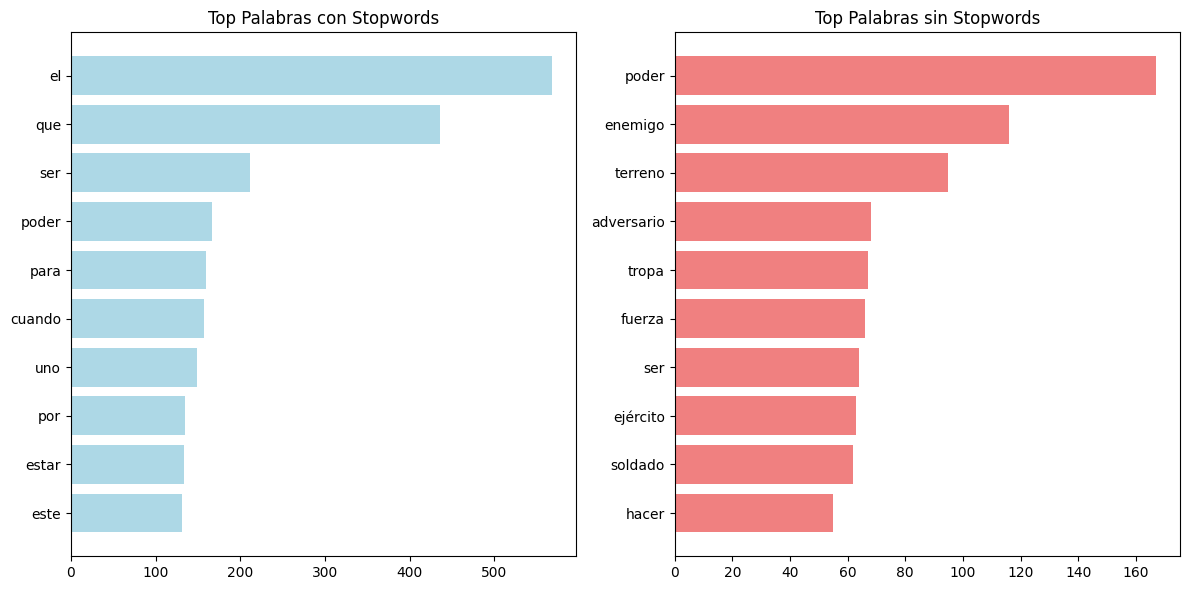

In [8]:
plt.figure(figsize=(12, 6))

# Preparar datos para gráfico
palabras_con, frecuencias_con = zip(*frecuencias_con_stopwords)
palabras_sin, frecuencias_sin = zip(*frecuencias_sin_stopwords)

plt.subplot(1, 2, 1)
plt.barh(palabras_con, frecuencias_con, color='lightblue')
plt.title('Top Palabras con Stopwords')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(palabras_sin, frecuencias_sin, color='lightcoral')
plt.title('Top Palabras sin Stopwords')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## POS Tagging

POS TAGGING CORRECTO (usando spaCy español)

CON STOPWORDS (primeras 15):
----------------------------------------
sun             -> AUX
tzu             -> AUX
arte            -> NOUN
guerra          -> NOUN
arte            -> PROPN
guerra          -> NOUN
mejor           -> ADJ
libro           -> NOUN
estrategia      -> NOUN
todo            -> DET
el              -> DET
tiempo          -> NOUN
inspirar        -> VERB
napoleón        -> ADJ
maquiavelo      -> NOUN

SIN STOPWORDS (primeras 15):
----------------------------------------
sun             -> AUX
tzu             -> AUX
arte            -> NOUN
guerra          -> NOUN
arte            -> PROPN
guerra          -> NOUN
mejor           -> ADJ
libro           -> NOUN
estrategia      -> NOUN
tiempo          -> NOUN
inspirar        -> VERB
napoleón        -> ADJ
maquiavelo      -> NOUN
mao             -> NOUN
tse             -> NOUN

DISTRIBUCIÓN DE CATEGORÍAS GRAMATICALES

CON STOPWORDS:

EXPLICACIÓN DE ETIQUETAS POS:
--------------

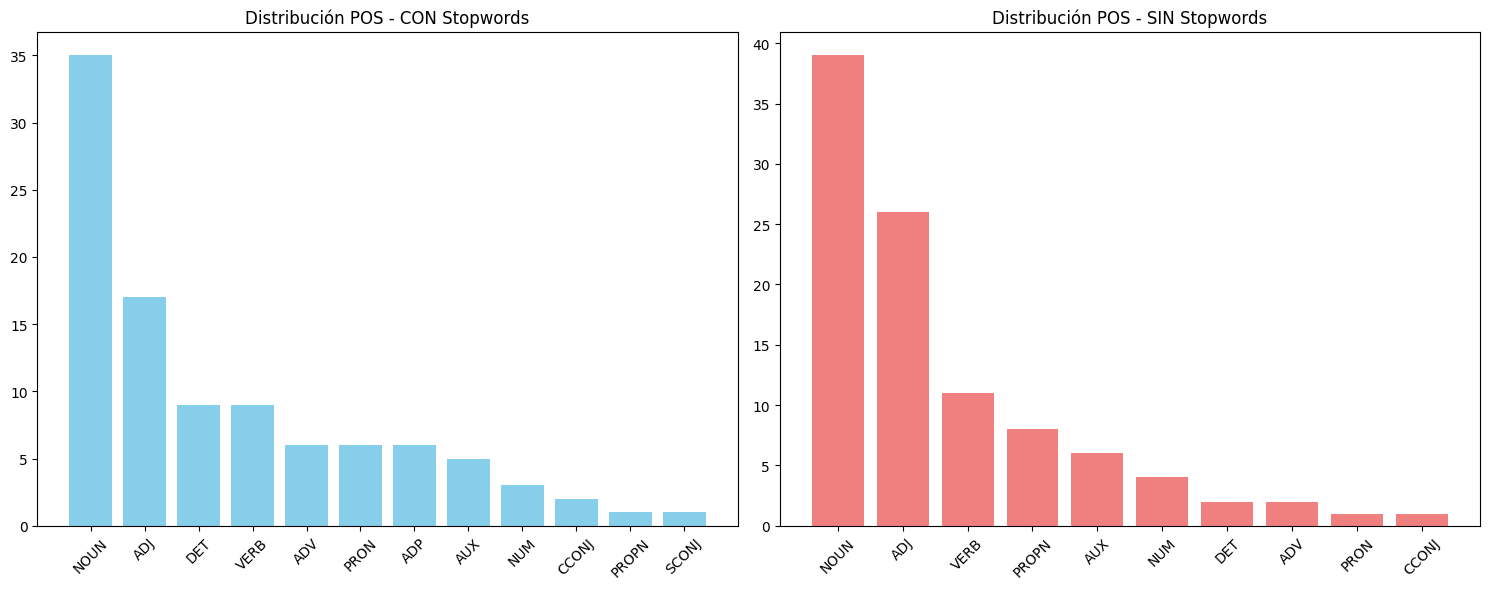


CAMBIOS SIGNIFICATIVOS AL REMOVER STOPWORDS
Tag    Con  Sin  Cambio %
------------------------------
PROPN     1    8  +700.0%
ADP       6    0  -100.0%
SCONJ     1    0  -100.0%
PRON      6    1   -83.3%
DET       9    2   -77.8%
ADV       6    2   -66.7%
ADJ      17   26   +52.9%
CCONJ     2    1   -50.0%
NUM       3    4   +33.3%
VERB      9   11   +22.2%

CONCLUSIONES:
• Los stopwords son principalmente DET (determinantes), ADP (preposiciones)
• Al remover stopwords, aumenta el porcentaje de NOUN (sustantivos) y VERB (verbos)
• La distribución POS se vuelve más representativa del contenido real del texto


In [9]:
nlp_es = spacy.load("es_core_news_sm")
def analisis_pos_espanol(tokens):
    # Unir tokens en texto para procesar con spaCy
    texto = " ".join(tokens[:100])  # Tomar muestra de 100 tokens
    doc = nlp_es(texto)

    # Obtener tags POS
    tags = [(token.text, token.pos_) for token in doc]

    # Contar tipos de palabras
    conteo_pos = Counter(tag for word, tag in tags)

    return tags, conteo_pos

# Aplicar a ambos casos
tags_con, conteo_con = analisis_pos_espanol(tokens_con_stopwords)
tags_sin, conteo_sin = analisis_pos_espanol(tokens_sin_stopwords)

print("=" * 60)
print("POS TAGGING CORRECTO (usando spaCy español)")
print("=" * 60)

print("\nCON STOPWORDS (primeras 15):")
print("-" * 40)
for word, tag in tags_con[:15]:
    print(f"{word:15} -> {tag}")

print("\nSIN STOPWORDS (primeras 15):")
print("-" * 40)
for word, tag in tags_sin[:15]:
    print(f"{word:15} -> {tag}")

# Función adicional para explicar las etiquetas
def explicar_etiquetas_pos(conteo):
    print("\nEXPLICACIÓN DE ETIQUETAS POS:")
    print("-" * 30)

    # Diccionario de explicaciones
    explicaciones = {
        'NOUN': 'Sustantivo (persona, lugar, cosa)',
        'VERB': 'Verbo (acción o estado)',
        'ADJ': 'Adjetivo (describe sustantivos)',
        'ADP': 'Preposición (en, de, por)',
        'DET': 'Determinante (el, la, un, una)',
        'PRON': 'Pronombre (yo, tú, él)',
        'CCONJ': 'Conjunción coordinante (y, o, pero)',
        'SCONJ': 'Conjunción subordinante (que, porque)',
        'ADV': 'Adverbio (rápidamente, muy)',
        'AUX': 'Verbo auxiliar (ser, estar, haber)',
        'PROPN': 'Nombre propio (Sun, Tzu)',
        'NUM': 'Número (uno, dos, primero)',
        'INTJ': 'Interjección (¡ay!, ¡hola!)',
        'PART': 'Partícula (no, sí)',
        'X': 'Otro (palabras extranjeras, símbolos)'
    }

    for tag, count in conteo.most_common():
        explicacion = explicaciones.get(tag, 'Desconocido')
        print(f"{tag:6} ({count:2} ocurrencias): {explicacion}")

# Mostrar explicaciones para ambos casos
print("\n" + "=" * 60)
print("DISTRIBUCIÓN DE CATEGORÍAS GRAMATICALES")
print("=" * 60)

print("\nCON STOPWORDS:")
explicar_etiquetas_pos(conteo_con)

print("\nSIN STOPWORDS:")
explicar_etiquetas_pos(conteo_sin)

# Análisis comparativo visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico con stopwords
tags_con_list, counts_con = zip(*conteo_con.most_common())
ax1.bar(tags_con_list, counts_con, color='skyblue')
ax1.set_title('Distribución POS - CON Stopwords')
ax1.tick_params(axis='x', rotation=45)

# Gráfico sin stopwords
tags_sin_list, counts_sin = zip(*conteo_sin.most_common())
ax2.bar(tags_sin_list, counts_sin, color='lightcoral')
ax2.set_title('Distribución POS - SIN Stopwords')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis de cambios importantes
print("\n" + "=" * 60)
print ("CAMBIOS SIGNIFICATIVOS AL REMOVER STOPWORDS")
print("=" * 60)

# Calcular diferencias porcentuales
cambios = []
for tag in set(conteo_con.keys()).union(set(conteo_sin.keys())):
    count_con = conteo_con.get(tag, 0)
    count_sin = conteo_sin.get(tag, 0)

    if count_con > 0:  # Evitar división por cero
        cambio_porcentual = ((count_sin - count_con) / count_con) * 100
        cambios.append((tag, count_con, count_sin, cambio_porcentual))

# Ordenar por mayor cambio
cambios.sort(key=lambda x: abs(x[3]), reverse=True)

print(f"{'Tag':6} {'Con':4} {'Sin':4} {'Cambio %':8}")
print("-" * 30)
for tag, con, sin, cambio in cambios[:10]:
    print(f"{tag:6} {con:4} {sin:4} {cambio:+7.1f}%")

# Conclusiones específicas
print("\nCONCLUSIONES:")
print("• Los stopwords son principalmente DET (determinantes), ADP (preposiciones)")
print("• Al remover stopwords, aumenta el porcentaje de NOUN (sustantivos) y VERB (verbos)")
print("• La distribución POS se vuelve más representativa del contenido real del texto")

##Comparación diversidad léxica

In [10]:
def calcular_diversidad_lexica(tokens):
    """
    Calcula la diversidad léxica (palabras únicas / total palabras).
    """
    palabras_unicas = len(set(tokens))
    total_palabras = len(tokens)
    return palabras_unicas / total_palabras

diversidad_con = calcular_diversidad_lexica(tokens_con_stopwords)
diversidad_sin = calcular_diversidad_lexica(tokens_sin_stopwords)

print(f"\nDIVERSIDAD LÉXICA:")
print(f"Con stopwords: {diversidad_con:.3f}")
print(f"Sin stopwords: {diversidad_sin:.3f}")
print(f"Mejora: {(diversidad_sin - diversidad_con) / diversidad_con * 100:.1f}%")


DIVERSIDAD LÉXICA:
Con stopwords: 0.226
Sin stopwords: 0.315
Mejora: 39.6%


## Stemming y Lematización

In [11]:
def comparar_stemming_lematizacion(tokens, num_ejemplos=15):
    """
    Compara los resultados de stemming y lematización.
    """
    # Filtrar palabras significativas
    palabras_significativas = [token for token in tokens if len(token) > 3][:num_ejemplos]

    # Aplicar stemming
    stemmer = SnowballStemmer('spanish')
    stems = [stemmer.stem(palabra) for palabra in palabras_significativas]

    # Aplicar lematización
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(' '.join(palabras_significativas))
    lemas = [token.lemma_ for token in doc]

    return list(zip(palabras_significativas, stems, lemas))

print("\nCOMPARACIÓN: STEMMING vs LEMATIZACIÓN")
print("=" * 55)
print(f"{'Palabra':15} {'Stemming':12} {'Lematización':15}")
print("-" * 55)

comparacion = comparar_stemming_lematizacion(tokens_sin_stopwords)
for palabra, stem, lema in comparacion:
    print(f"{palabra:15} {stem:12} {lema:15}")

# Análisis de diferencias
diferencias = sum(1 for _, stem, lema in comparacion if stem != lema)
total = len(comparacion)
print(f"\nDiferencias encontradas: {diferencias}/{total} ({diferencias/total*100:.1f}%)")


COMPARACIÓN: STEMMING vs LEMATIZACIÓN
Palabra         Stemming     Lematización   
-------------------------------------------------------
arte            arte         arte           
guerra          guerr        guerra         
arte            arte         arte           
guerra          guerr        guerra         
mejor           mejor        mejor          
libro           libr         libro          
estrategia      estrategi    estrategia     
tiempo          tiemp        tiempo         
inspirar        inspir       inspirar       
napoleón        napoleon     napoleón       
maquiavelo      maquiavel    maquiavelo     
tung            tung         tung           
mucho           much         mucho          
figura          figur        figura         
histórico       histor       histórico      

Diferencias encontradas: 11/15 (73.3%)


# CONCLUSIONES VISUALES FINALES

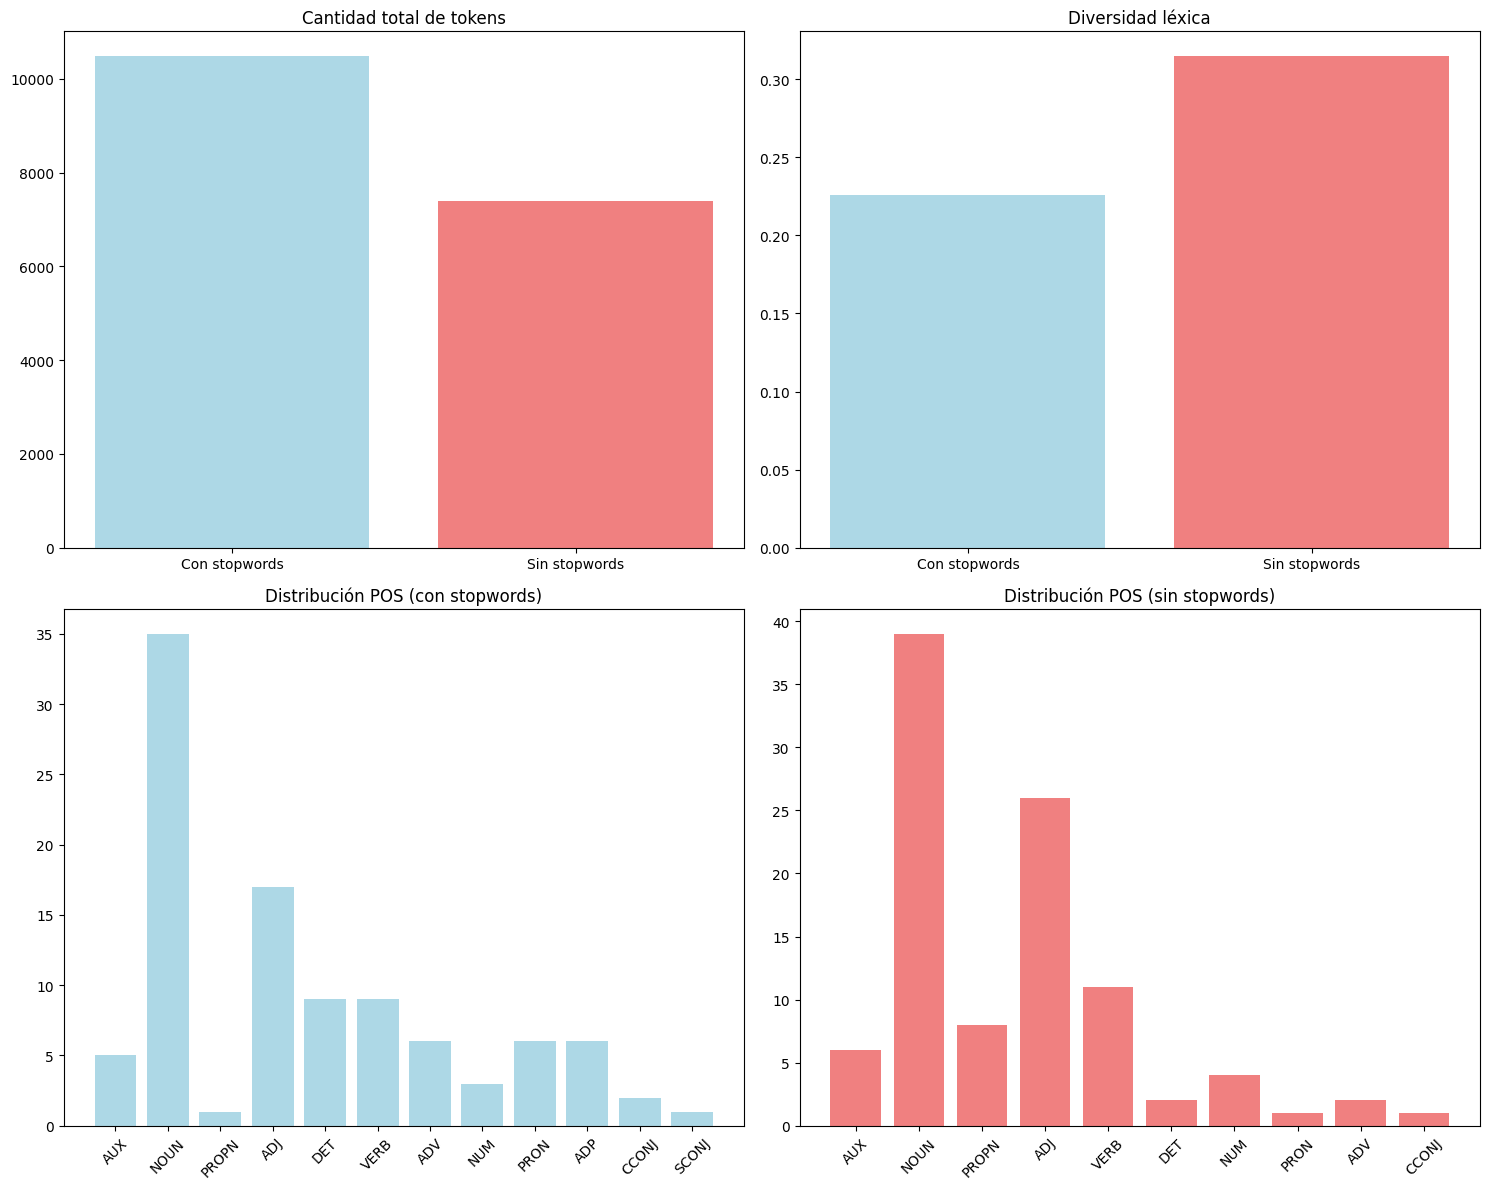


CONCLUSIONES DEL ANÁLISIS
1. La remoción de stopwords reduce significativamente el número
   total de tokens mientras mantiene el contenido semántico.
2. La diversidad léxica mejora al remover palabras vacías.
3. Las palabras más frecuentes cambian radicalmente:
   - Con stopwords: artículos, preposiciones, conjunciones
   - Sin stopwords: sustantivos, verbos, adjetivos clave
4. Stemming y lematización muestran diferencias en cómo
   reducen las palabras a sus formas base.
5. El procesamiento sin stopwords ofrece una representación
   más significativa del contenido del texto.


In [12]:
# GRÁFICO COMPARATIVO FINAL
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Cantidad de tokens
ax1.bar(['Con stopwords', 'Sin stopwords'],
        [len(tokens_con_stopwords), len(tokens_sin_stopwords)],
        color=['lightblue', 'lightcoral'])
ax1.set_title('Cantidad total de tokens')

# 2. Diversidad léxica
ax2.bar(['Con stopwords', 'Sin stopwords'],
        [diversidad_con, diversidad_sin],
        color=['lightblue', 'lightcoral'])
ax2.set_title('Diversidad léxica')

# 3. Tipos de palabras (POS) con stopwords
tags = list(conteo_con.keys())
counts = list(conteo_con.values())
ax3.bar(tags, counts, color='lightblue')
ax3.set_title('Distribución POS (con stopwords)')
ax3.tick_params(axis='x', rotation=45)

# 4. Tipos de palabras (POS) sin stopwords
tags = list(conteo_sin.keys())
counts = list(conteo_sin.values())
ax4.bar(tags, counts, color='lightcoral')
ax4.set_title('Distribución POS (sin stopwords)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Conclusiones finales
print("\n" + "=" * 60)
print("CONCLUSIONES DEL ANÁLISIS")
print("=" * 60)
print("1. La remoción de stopwords reduce significativamente el número")
print("   total de tokens mientras mantiene el contenido semántico.")
print("2. La diversidad léxica mejora al remover palabras vacías.")
print("3. Las palabras más frecuentes cambian radicalmente:")
print("   - Con stopwords: artículos, preposiciones, conjunciones")
print("   - Sin stopwords: sustantivos, verbos, adjetivos clave")
print("4. Stemming y lematización muestran diferencias en cómo")
print("   reducen las palabras a sus formas base.")
print("5. El procesamiento sin stopwords ofrece una representación")
print("   más significativa del contenido del texto.")